# Mean, Median, Mode, and Skew

- Mean = Average.

- Median = Middle value of data set in ascending order.

- Mode = Most frequent value.

- Skew = Out range data compared to average.

In [0]:
# Importing library

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [0]:
# Pandas display options

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

In [0]:
# # Plot style

# style.use('fivethirtyeight')
# style.use('seaborn')
style.use('ggplot')

In [0]:
# Creating a function to plot.

def skew_plot(data_series, title):
    # plt.figure(figsize=(10,10))
    sns.distplot(data_series)
    plt.title(title)
    plt.show()
    print(f'Mean = {data_series.mean():.2f},Median = {data_series.median():.2f}, Mode = {data_series.mode().values}, Skew = {data_series.skew():.2f}')
    
    

## Let's explain with an example

Let's consider we have sample data that denotes the burger price in different shops in **New York** and **Los Angeles**.

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# File path

path = '/content/drive/My Drive/GitHub/Mean_Median/data/' # If you are using colab, use this variable and comment the below one.
# path = 'data/' # If you are using normal editor, use this variable and comment the above one.


In [0]:
# Reading file

mean_median_df = pd.read_excel(f'{path}Mean_Median.xlsx', sheet_name='Mean_Median')

In [198]:
mean_median_df

,NW_Shops,Burger_price_in_NewYork,LA_Shops,Burger_price_in_Los_Angeles
0,Shop1,1,Shop1,1.00
1,Shop2,2,Shop2,2.00
2,Shop3,3,Shop3,3.00
3,Shop4,3,Shop4,4.00
4,Shop5,5,Shop5,5.00
5,Shop6,6,Shop6,6.00
6,Shop7,7,Shop7,7.00
7,Shop8,8,Shop8,8.00
8,Shop9,9,Shop9,9.00
9,Shop10,11,Shop10,10.00


### Average price (Mean)

Let's find the average price of a burger in both the states and consider that *below-average price* as **cheap**, *above average-price* as **costly**.

In [199]:
# Let's check the average price of burger in each state.

avg_nw = mean_median_df['Burger_price_in_NewYork'].mean()
avg_la = mean_median_df['Burger_price_in_Los_Angeles'].mean()

print(f'Average burger price in New York = {avg_nw} and Los Angeles = {avg_la}')

Average burger price in New York = 11.0 and Los Angeles = 5.5


As said, the average burger price in Los Angeles is 5.5. 

Hence, In Los Angeles

 - burger prices - **1, 2, 3, 4, 5** are considered as *cheap*.

 - burger prices - **6, 7, 8, 9, 10** are considered as *expensive*.


In New York,

 - burger prices - **1, 2, 3, 5, 6, 7, 8, 9** are considered as *cheap*.

 - burger prices - **66** is considered as *expensive*.

 Why this difference in average price between 2 states?

Is this correct measure to set the cut off values to distinguish cheap and expensive?

Hmmm. Well, Let's check Min and Max



In [200]:
# Cheapest, expensive price of Burger in New York and Los Angeles.

cheap_nw = mean_median_df['Burger_price_in_NewYork'].min()
expensive_nw = mean_median_df['Burger_price_in_NewYork'].max()

cheap_la = mean_median_df['Burger_price_in_Los_Angeles'].min()
expensive_la = mean_median_df['Burger_price_in_Los_Angeles'].max()

print(f'Cheapest burger price in New York = {cheap_nw} and Los Angeles = {int(cheap_la)}')
print(f'Expensive burger price in New York = {expensive_nw} and Los Angeles = {int(expensive_la)}')

Cheapest burger price in New York = 1 and Los Angeles = 1
Expensive burger price in New York = 66 and Los Angeles = 10


Cheapest price of the burger is the same in both the places. But one of the shops in New York sells burger at too costly compared to Los Angeles.

How to find the cut-off value which distinguishes cheap and expensive price range? The average price doesn't seem to be correct.

In [201]:
median_ny = mean_median_df['Burger_price_in_NewYork'].median()
median_la = mean_median_df['Burger_price_in_Los_Angeles'].median()
print(f'Median burger price in New York = {median_ny} and Los Angeles = {median_la}')

Median burger price in New York = 6.0 and Los Angeles = 5.5


- Prices below 6.0 in New York are the cheapest and above 6 are expensive. 

    (1,2,3,5) - Cheap. (7,8,9,11,66) - Expensive.

- Prices below 5.5 in Los Angeles are the cheapest and above 5.5 are expensive.

    (1,2,3,4,5) - Cheap. (6,7,8,9,10) - Expensive.


Median seems to be right. But why not average? Because burger in shop11 (New York) is too costly which is causing the more difference in averages between 2 states. But how to find the price is too high or too low. Thats where skewness helps. Let's understand in detail with some plotting.

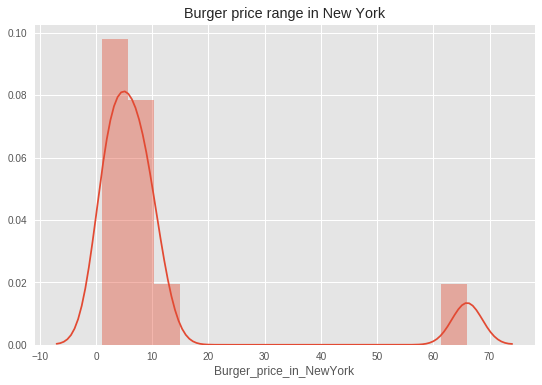

Mean = 11.00,Median = 6.00, Mode = [3], Skew = 3.15


In [202]:
skew_plot(mean_median_df['Burger_price_in_NewYork'], 'Burger price range in New York')

The above plot shows the burger price in New york. we have a bar at 66 which is on the right side of the plot. The distribution curve extends to the right side (Right/Positive Skew). That means the burger price is too high compared to average.


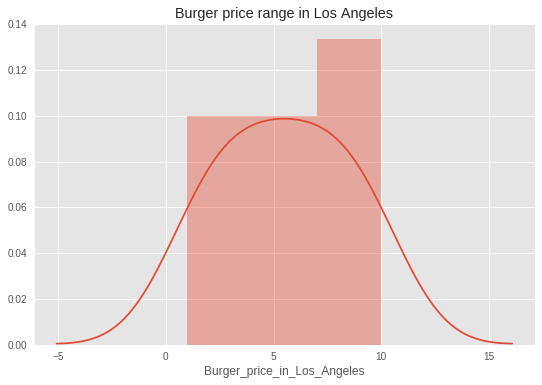

Mean = 5.50,Median = 5.50, Mode = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.], Skew = 0.00


In [203]:
skew_plot(mean_median_df['Burger_price_in_Los_Angeles'].dropna(), 'Burger price range in Los Angeles')

The above plot shows the burger price in Los Angeles. The distribution curve equally spread, That means there is not too high or too low burger price compared to average.

## Let's deal with real data

Titanic dataset. [Download here](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

In [0]:
# Titanic dataset

titanic_df = pd.read_csv(f'{path}titanic.csv')

In [205]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.00,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.00,1,0,71.28
2,1,3,Miss. Laina Heikkinen,female,26.00,0,0,7.92
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.00,1,0,53.10
4,0,3,Mr. William Henry Allen,male,35.00,0,0,8.05


### Right Skew

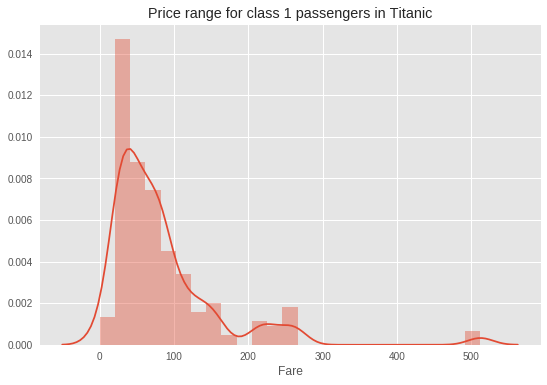

Mean = 84.15,Median = 60.29, Mode = [26.55], Skew = 2.84


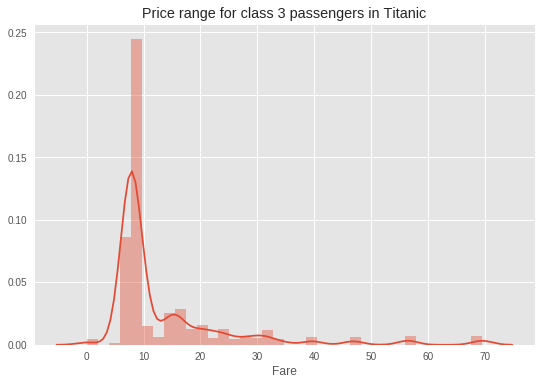

Mean = 13.71,Median = 8.05, Mode = [8.05], Skew = 2.72


In [206]:
skew_plot(titanic_df[titanic_df['Pclass'] == 1].Fare, 'Price range for class 1 passengers in Titanic')

skew_plot(titanic_df[titanic_df['Pclass'] == 3].Fare, 'Price range for class 3 passengers in Titanic')

### No Skew

Almost no skew (Slightly right skewed). :-p


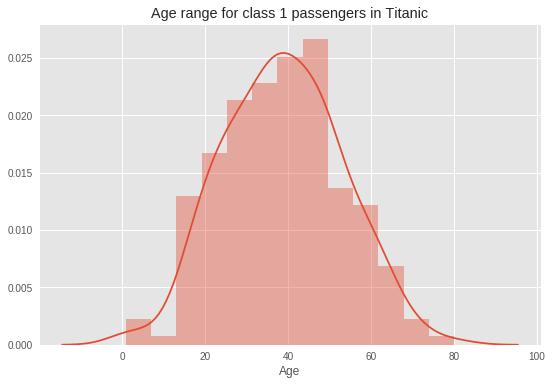

Mean = 38.79,Median = 38.50, Mode = [35. 36.], Skew = 0.06


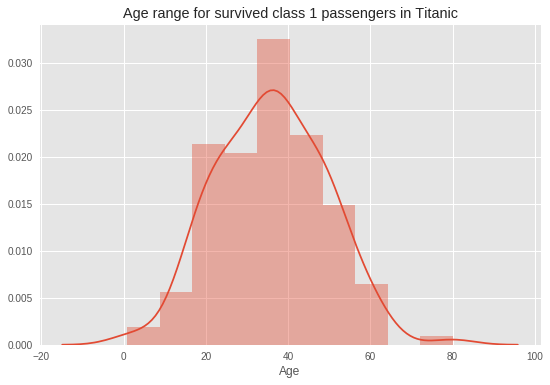

Mean = 35.96,Median = 36.00, Mode = [35.], Skew = 0.13


In [207]:
skew_plot(titanic_df[titanic_df['Pclass'] == 1].Age, 'Age range for class 1 passengers in Titanic')

skew_plot(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == 1)].Age, 'Age range for survived class 1 passengers in Titanic')

### Left Skew

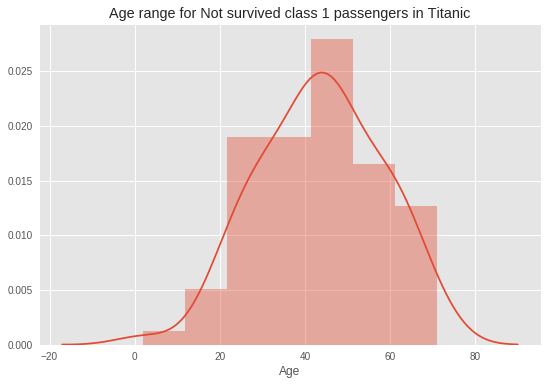

Mean = 43.59,Median = 45.00, Mode = [45. 47.], Skew = -0.19


In [208]:
skew_plot(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == 0)].Age, 'Age range for Not survived class 1 passengers in Titanic')

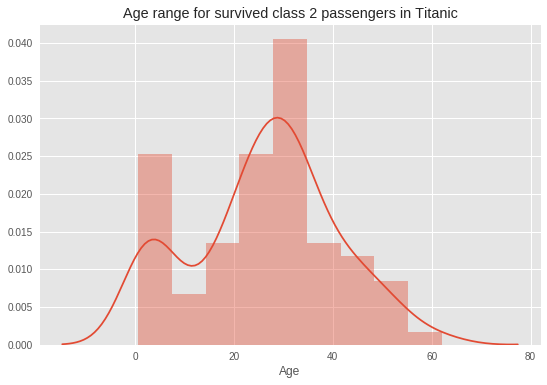

Mean = 26.17,Median = 28.00, Mode = [24.], Skew = -0.07


In [209]:
skew_plot(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Survived'] == 1)].Age, 'Age range for survived class 2 passengers in Titanic')

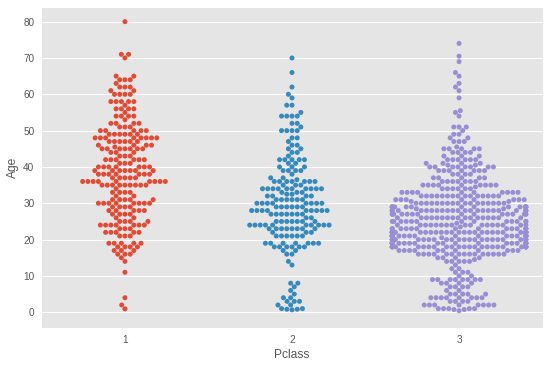

In [210]:
sns.swarmplot(x='Pclass',  y='Age', data=titanic_df)

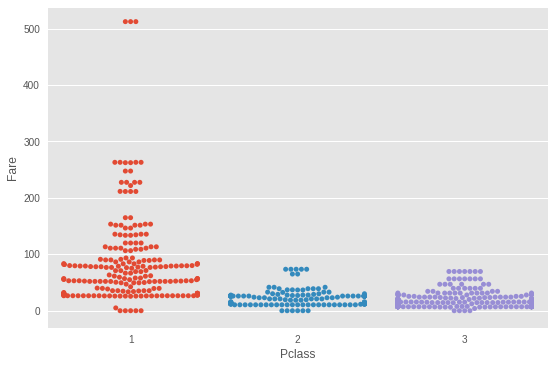

In [211]:
sns.swarmplot(x='Pclass',  y='Fare', data=titanic_df)

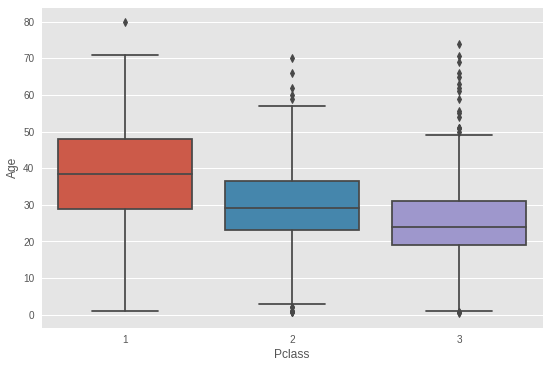

In [212]:
sns.boxplot(x='Pclass',  y='Age', data=titanic_df)

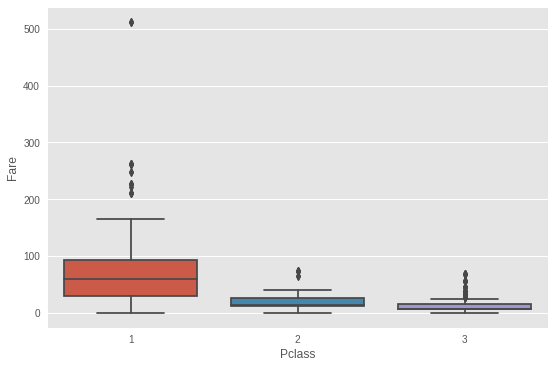

In [213]:
sns.boxplot(x='Pclass',  y='Fare', data=titanic_df)

# Histogram Plot

Histogram plot is a simple and convenient way to see the frequency of occurences in a data set. Data sets are divided into small groups called bins.

**Drawback of Histogram plot:**


- The same data set  can look different depending on how the bins are chosen. The choice of bins is in may ways arbitrary (Binning bias).

- It is not plotting all the values, It is sweeping the data into bins and losing their actual values.

# Swarm Plot

Swarm plot is used to display all the observations(values) along with the underlying distribution of a data set.

**Drawback of Swarm plot:**


- When the number of data is very large, swarm plots are too cluttered.

# Box Plot

A boxplot is a standardized way of displaying the dataset based on a **five-number summary**: *the minimum, the maximum, the sample median, and the first and third quartiles*.

- **Minimum** : the lowest data point excluding any outliers.

- **Maximum** : the largest data point excluding any outliers.

- **Median (Q2 / 50th Percentile)** : the middle value of the dataset.

- **First quartile (Q1 / 25th Percentile)** : is also known as the lower quartile qn(0.25) and is the middle value between the smallest number (not the minimum) and the median of the dataset.

- **Third quartile (Q3 / 75th Percentile)** : is also known as the upper quartile qn(0.75) and is the middle value between the largest number (not the maximum) and the median of the dataset.

## Summary

- Mean is heavily influenced by extreme values or data points whose value is far greater or less than most of the rest of the data. 

- Median is derived from the ranking of sorted data and not on the values of the data, the Median is not affected by the data that take on extreme values

It is not easy to find the skewness by the plot. we have to rely on skew calculation(function).


If Mean and Median are equal or almost equal, Average(Mean) is used for a central tendency. If Mean is not equal to Median then Median is used for central tendency measurement.

Mean Median | Skew | Central tendency
--- | --- | ---
`Mean = Median` | No Skew | **Mean (Average)**
`Mean > Median` | Right Skew | **Median**
`Mean < Median` | Left Skew | **Median**



